In [1]:
import sys
if not '..' in sys.path:
    sys.path.append('..')
print(sys.path)

['/Users/spencer/phd/phd/analysis/notebooks', '/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python311.zip', '/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.11', '/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.11/lib-dynload', '', '/opt/homebrew/Caskroom/miniconda/base/envs/data/lib/python3.11/site-packages', '..']


In [5]:
from pathlib import Path
from analysis import files, analysis
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

root_data_path = Path("/Users/spencer/motor-control/data")
metadata_path = root_data_path / "metadata" 
rawdata_path = root_data_path / "rawdata"

Text(0.5, 0, 'Worst Performer')

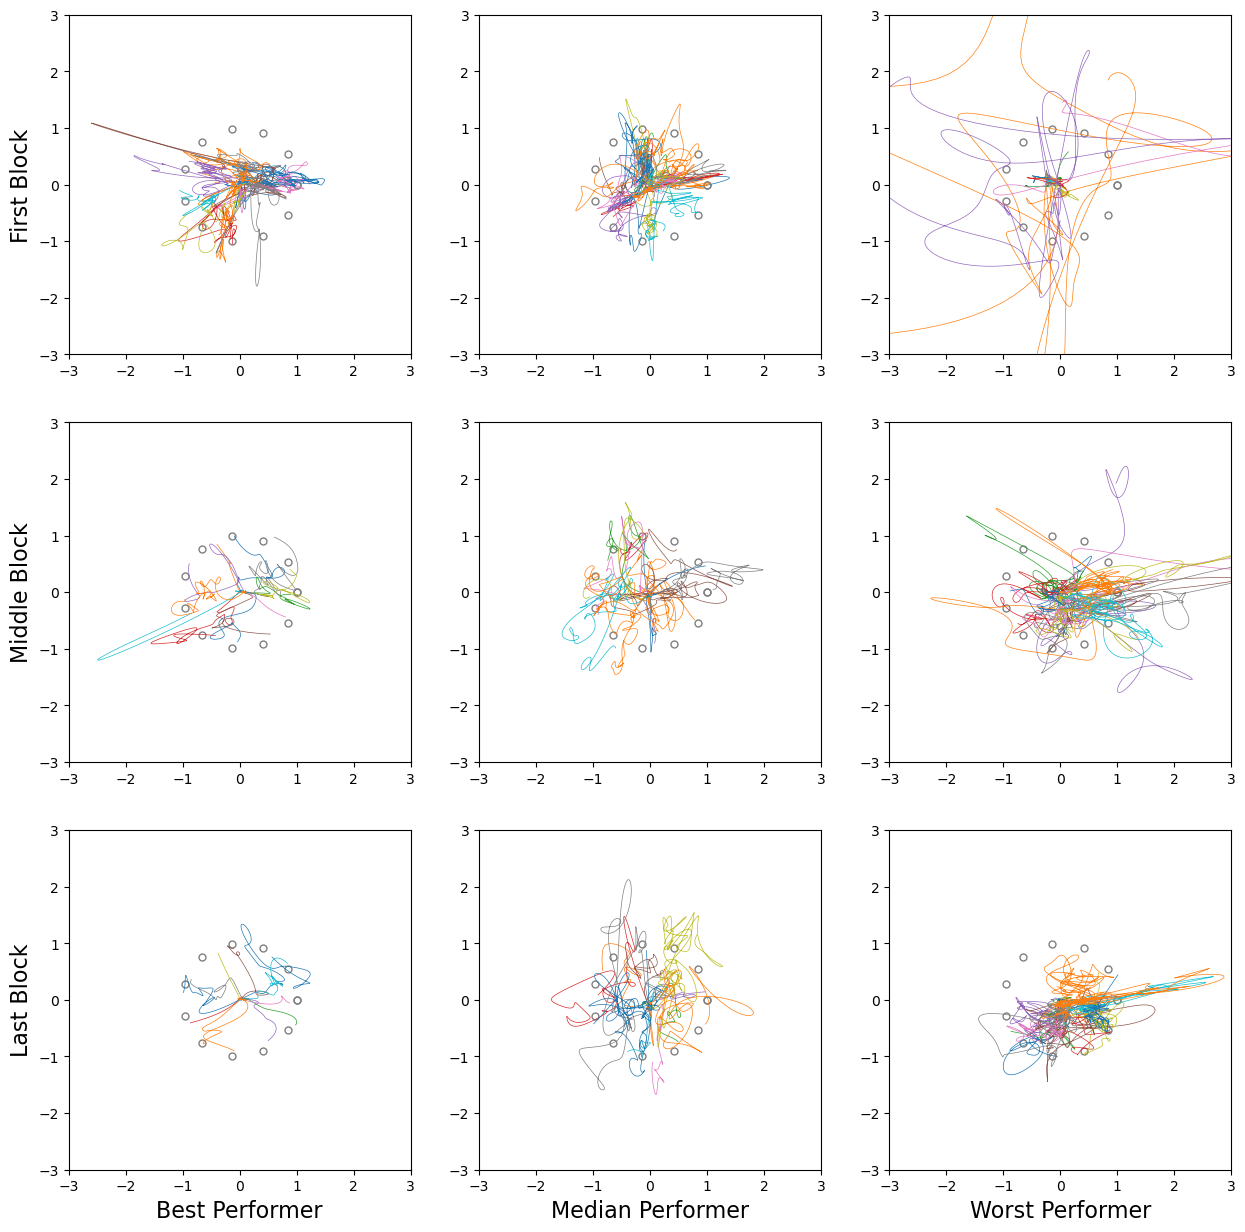

In [5]:
experiment = "emg_olympics"
task = "center_hold"

behavior_fig, axes = plt.subplots(3,3, figsize=(15,15))
for ax in axes.flatten():
    ax.set_xlim([-3,3])
    ax.set_ylim([-3,3])
    analysis.plot_targets(ax)

# most hits, median, least
sessions = [0,22,-1]
for col, subject in enumerate(["morio", "holly", "hyewon"]):
    # sort by session number
    sorted_session_paths = sorted([x for x in (rawdata_path / experiment / subject / task).iterdir() if x.name[0] != "." and "session" in x.name], key=lambda x: int(x.name.split("_")[-1]))
    # first, middle, last session over rows
    for row in range(3):
        session_path = sorted_session_paths[sessions[row]]
        s = analysis.Session(session_path)
        for t in s.trials:
            behavior = analysis.load_behavior(t.behavior_path)
            axes[row,col].plot(behavior[:,-2],behavior[:,-1], linewidth=0.5)

axes[0,0].set_ylabel("First Block", fontsize=16)
axes[1,0].set_ylabel("Middle Block", fontsize=16)
axes[2,0].set_ylabel("Last Block", fontsize=16)
axes[2,0].set_xlabel("Best Performer", fontsize=16)
axes[2,1].set_xlabel("Median Performer", fontsize=16)
axes[2,2].set_xlabel("Worst Performer", fontsize=16)


In [6]:
behavior_fig.savefig("/Users/spencer/motor-control/thesis/images/data_analysis2023/behavior.pdf", dpi=300, format="pdf")